### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

### Getting Input

In [2]:
ins = pd.read_csv('d://DataSets_DataScience/Project/InsClaimPred/train.csv')
ins.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


### Correlation

In [3]:
ins.corr()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,1.000000,-0.000188,0.000826,0.001646,-0.001307,0.000168,0.000022,-0.000093,0.002473,-0.000479,...,-0.001249,-0.001093,-0.000157,0.001609,-0.001227,-0.001412,-0.001267,-0.001387,0.000194,-0.001267
target,-0.000188,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,...,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.000826,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,...,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.001646,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,...,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,-0.001307,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,...,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.000168,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,...,-0.002001,-0.000814,0.000283,0.001565,0.002735,0.002295,0.000773,0.000916,-0.001966,0.001244
ps_ind_05_cat,0.000022,0.029165,0.014823,-0.014860,0.053250,0.013053,1.000000,0.009619,-0.010382,0.004881,...,-0.001525,0.000975,0.001549,0.002171,0.001548,-0.000368,0.000153,0.000032,0.000276,0.000279
ps_ind_06_bin,-0.000093,-0.034017,-0.277458,-0.125653,-0.045158,-0.297737,0.009619,1.000000,-0.474009,-0.356838,...,0.000822,0.001347,-0.001301,0.000304,0.002088,-0.000381,-0.000001,-0.000759,0.002791,0.000203
ps_ind_07_bin,0.002473,0.034218,0.005700,0.016398,-0.060368,0.304949,-0.010382,-0.474009,1.000000,-0.260438,...,-0.000448,-0.001044,0.000541,0.001666,0.000575,0.001220,-0.000517,0.000181,-0.001361,-0.000961
ps_ind_08_bin,-0.000479,0.013147,0.188583,0.030945,0.014037,0.044978,0.004881,-0.356838,-0.260438,1.000000,...,-0.000632,-0.001241,-0.000432,-0.001959,-0.002782,-0.002048,-0.000579,-0.000068,-0.000919,0.000995


### Correlation Visualisation

<AxesSubplot:>

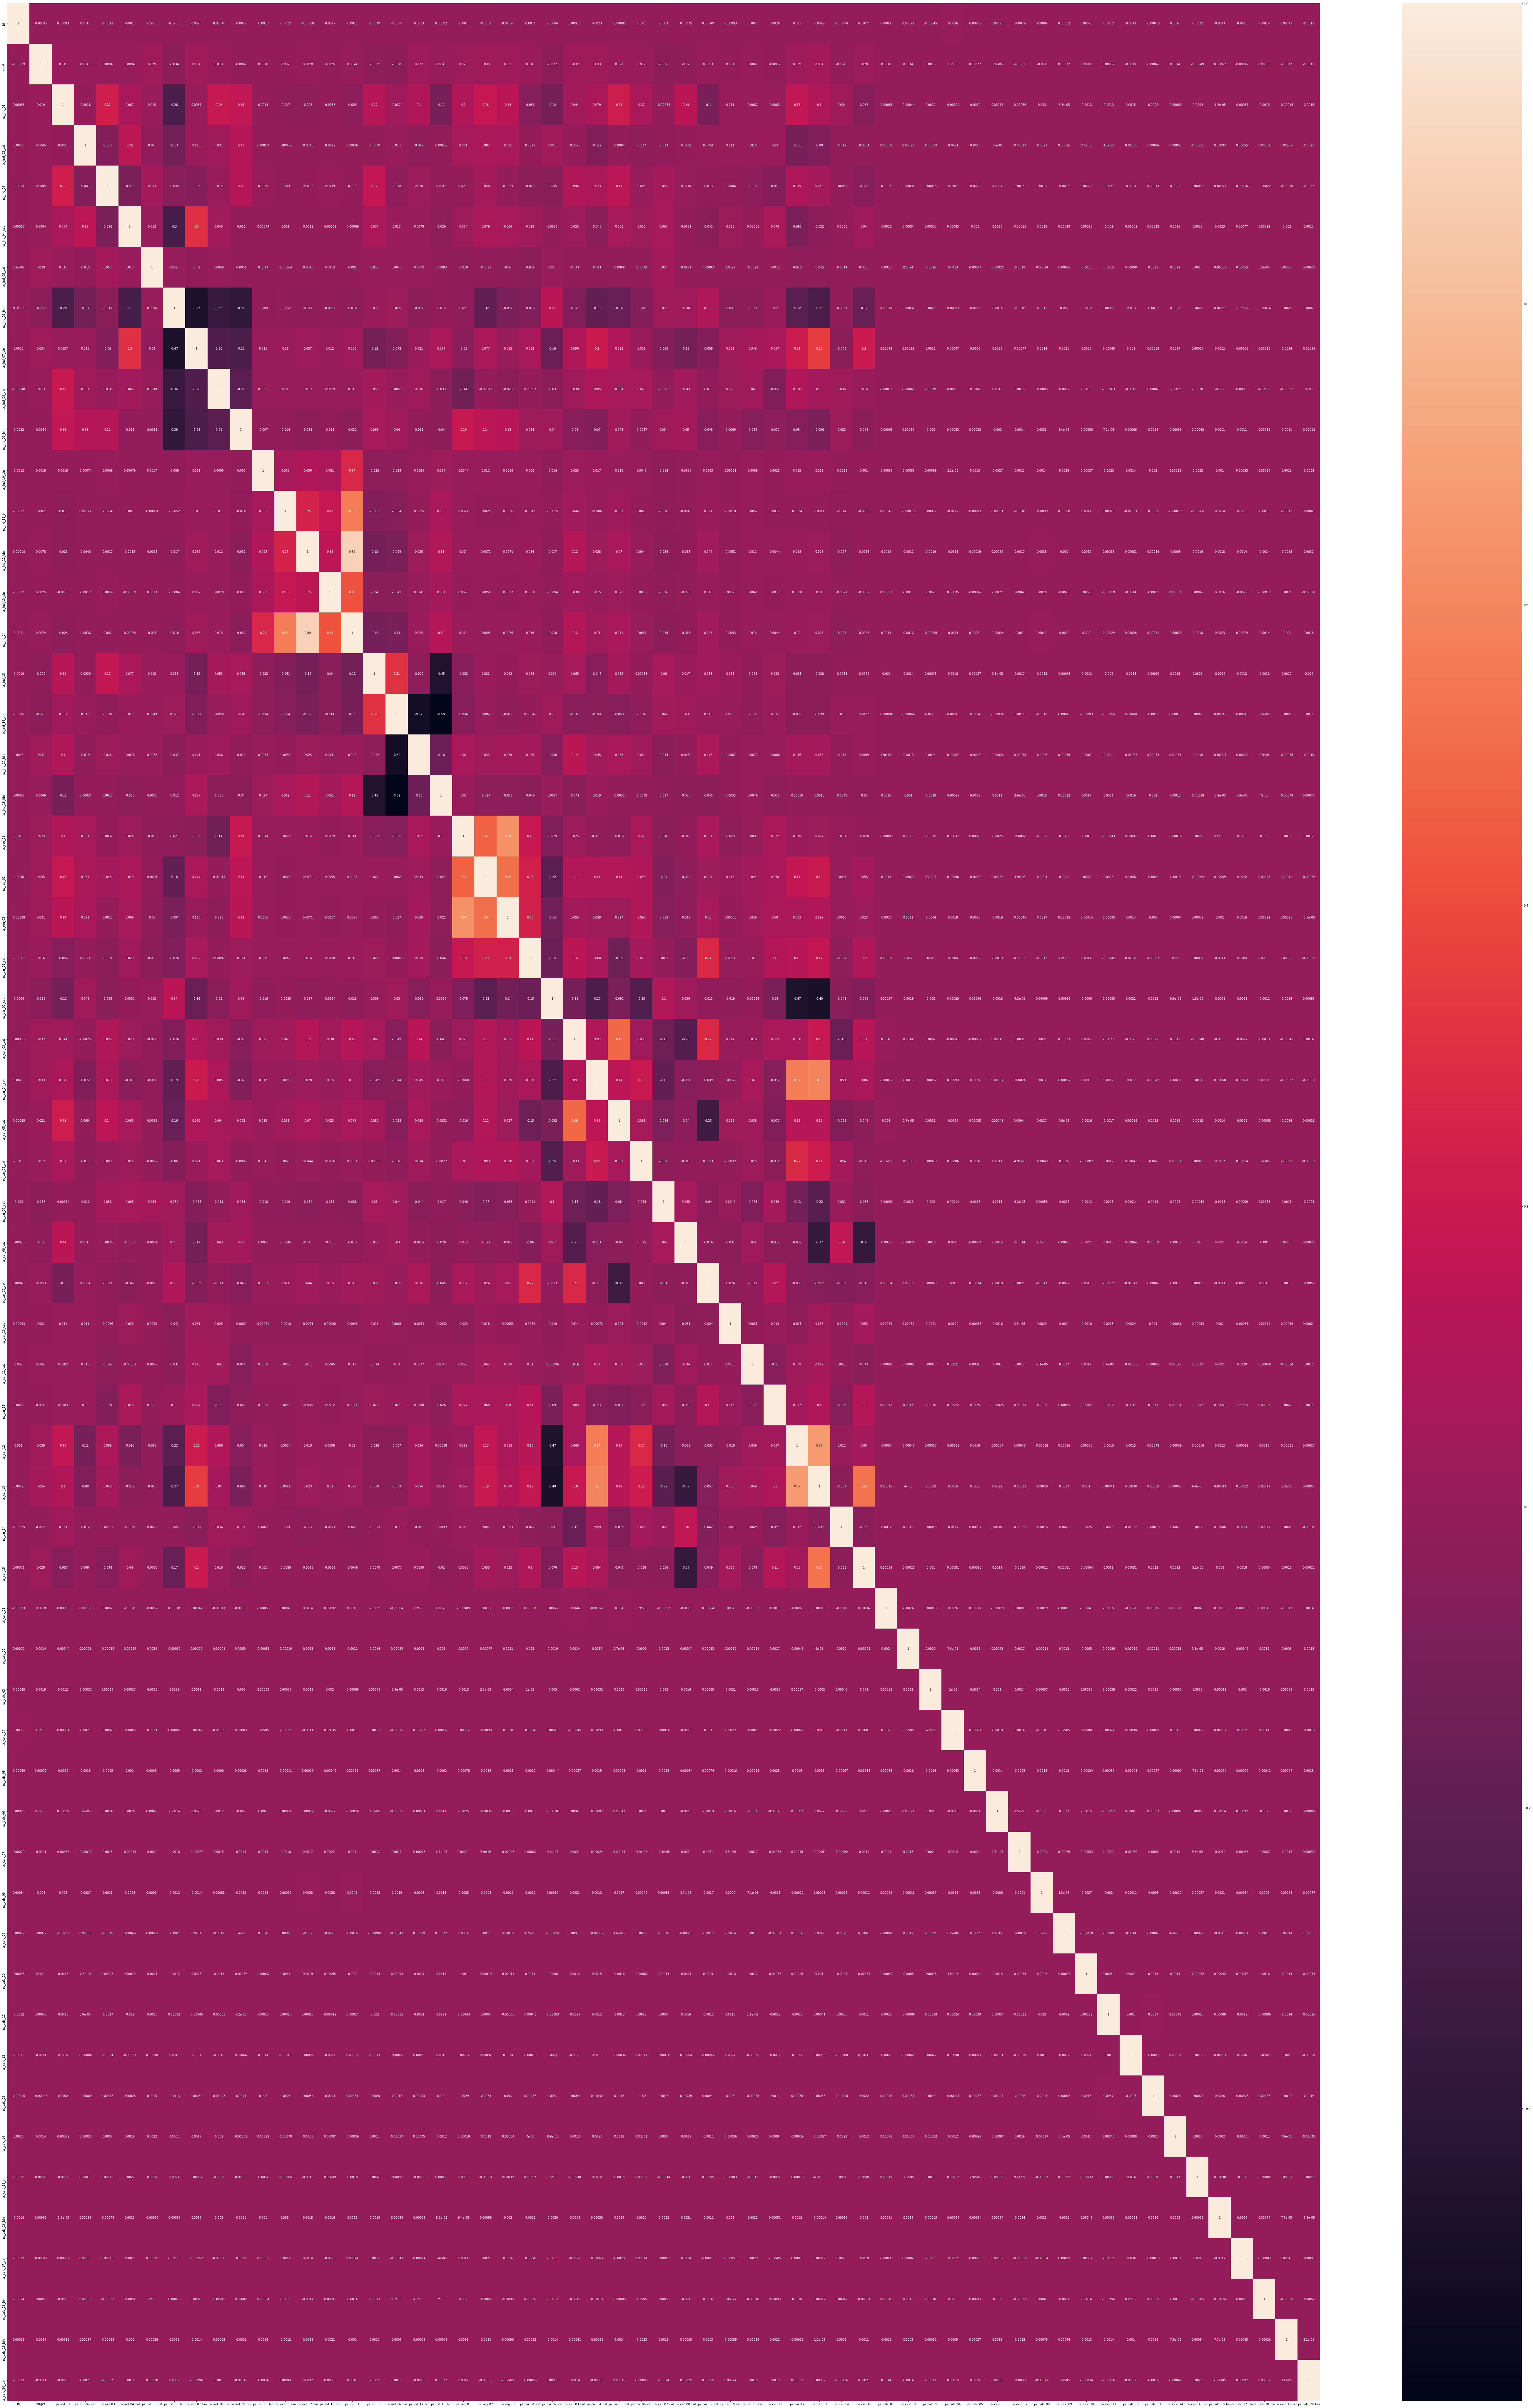

In [4]:
plt.figure(figsize=(100,150))
sb.heatmap(ins.corr(),annot=True)

In [5]:
# Create correlation matrix
corr_matrix = ins.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.50
higher_corr = [column for column in upper.columns if any(upper[column] > 0.50)]
higher_corr

['ps_ind_14',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_03',
 'ps_car_12',
 'ps_car_13',
 'ps_car_15']

### EDA of data 

In [6]:
ins.shape

(595212, 59)

In [7]:
ins.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [8]:
ins[ins.duplicated()]

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin


In [9]:
#Create a frame that stores multiple data 
data = []
for f in ins.columns:
    #Define the role
    if f == 'target':
        role = 'target'
    elif f =='id':
        role = 'id'
    else:
        role = 'input'
    
    #Define the type of data 
    if 'bin' in f or f =='target':
        type_of_data = 'binary'
    elif 'cat' in f or f == 'id':
        type_of_data = 'nominal'
    elif ins[f].dtype == 'float64':
        type_of_data = 'continuous'
    elif ins[f].dtype == 'int64':
        type_of_data = 'ordinal'
        
    #Define the keep
    keep = True
    if f =='id':
        keep = False
    
    #Defining the dtype
    dtype = ins[f].dtype
    type_of_data
    #Creating a Dict that contains all the metadata for the variable 
    f_dict = {
        'varname': f,
        'role': role,
        'type_of_data': type_of_data,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
alpha = pd.DataFrame(data, columns = ['varname', 'role', 'type_of_data', 'keep', 'dtype'])
alpha.set_index('varname', inplace=True)

In [10]:
alpha

,role,type_of_data,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [11]:
#Displaying only Nominal data features
alpha.loc[(alpha.type_of_data == 'nominal') & (alpha.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [12]:
#Displaying only Continuous data features
alpha.loc[(alpha.type_of_data == 'continuous') & (alpha.keep)].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object', name='varname')

In [13]:
#Displaying only Ordinal data features
alpha.loc[(alpha.type_of_data == 'ordinal') & (alpha.keep)].index

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',
       'ps_calc_14'],
      dtype='object', name='varname')

In [14]:
#Displaying only Binary data features
alpha.loc[(alpha.type_of_data == 'binary') & (alpha.keep)].index

Index(['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='object', name='varname')

In [15]:
##Displaying total no. of data features
pd.DataFrame({'count' : alpha.groupby(['role', 'type_of_data'])['role'].size()}).reset_index()

,role,type_of_data,count
0,id,nominal,1
1,input,binary,17
2,input,continuous,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


In [16]:
# Describing the Continuous features 
v = alpha[(alpha.type_of_data == 'continuous') & (alpha.keep)].index 
ins[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [17]:
# Describing the Ordinal features 
o = alpha[(alpha.type_of_data == 'ordinal') & (alpha.keep)].index 
ins[o].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


In [18]:
# Describing the Binary features 
b = alpha[(alpha.type_of_data == 'binary') & (alpha.keep)].index 
ins[b].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# Describing the Nominal features 
d = alpha[(alpha.type_of_data == 'binary') & (alpha.keep)].index 
ins[d].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
Counter(ins.target)

Counter({0: 573518, 1: 21694})

**As data set is imbalanced we can make two approaches to solve the problem**
 - step-1 : we can do over-sampling to improvise the target output-1.
 - step-2 : we can do the under-sampling of target-0 to reduce the no. of data. 

### Importing Packages for Modeling

In [21]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [22]:
# Splitting data into X and Y

X = ins.iloc[ : ,[2,3,4,5,6,7,8,9,10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58]]
y = ins.target

### Splitting data into train and test

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

### Applying Smote

In [24]:
smote = SMOTE()

In [25]:
X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

### over sampling

In [26]:
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 401402, 1: 15246})
SMOTE Classes Counter({0: 401402, 1: 401402})


In [27]:
model = LogisticRegression()
model.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [28]:
y_pre = model.predict(X_test)
accuracy_score(y_test,y_pre)

0.6080676956161376

In [29]:
print(classification_report(y_test,y_pre))
confusion_matrix(y_test,y_pre)

              precision    recall  f1-score   support

           0       0.97      0.61      0.75    172116
           1       0.05      0.55      0.09      6448

    accuracy                           0.61    178564
   macro avg       0.51      0.58      0.42    178564
weighted avg       0.94      0.61      0.73    178564



array([[105007,  67109],
       [  2876,   3572]], dtype=int64)

## under sampling

In [30]:
from imblearn.under_sampling import NearMiss
near = NearMiss()

In [31]:
X_train_near,y_train_near = near.fit_resample(X_train.astype('float'),y_train)

In [32]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("NEARMISS Classes",Counter(y_train_near))

Actual Classes Counter({0: 401402, 1: 15246})
NEARMISS Classes Counter({0: 15246, 1: 15246})


In [33]:
model = LogisticRegression()
model.fit(X_train_near,y_train_near)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.36619363365516006

In [34]:
print(classification_report(y_test,y_pre))
confusion_matrix(y_test,y_pre)

              precision    recall  f1-score   support

           0       0.97      0.61      0.75    172116
           1       0.05      0.55      0.09      6448

    accuracy                           0.61    178564
   macro avg       0.51      0.58      0.42    178564
weighted avg       0.94      0.61      0.73    178564



array([[105007,  67109],
       [  2876,   3572]], dtype=int64)